# Aplicación de Inteligencia de Negocio en la FIFA
En este reto, asumirás el papel de un analista de la Federación Internacional de Fútbol Asociación (FIFA), la máxima autoridad del fútbol a nivel mundial. El CEO de la FIFA ha expresado un fuerte interés en promover el fútbol femenino y ha solicitado tu ayuda para desarrollar un enfoque analítico que incentive el reclutamiento y la retención de talento en este ámbito.

Tu tarea consiste en crear un modelo de valoración salarial que permita identificar y compensar adecuadamente a las futbolistas femeninas con base en su rendimiento, habilidades técnicas, impacto en el equipo y otros criterios relevantes. Utilizarás datos históricos de partidos, estadísticas de desempeño y otros indicadores pertinentes para evaluar el valor económico de las jugadoras.
El CEO espera que tu análisis proporcione una base sólida para diseñar estrategias de inversión y desarrollo que impulsen el crecimiento y la competitividad del fútbol femenino a nivel mundial.

¡Prepárate para aplicar tus habilidades analíticas en beneficio del deporte en esta desafiante tarea!
Aquí tienes información contextual necesaria provista por el CEO para una tienda piloto de la cadena de tiendas:

1.	Tendrás 2 datasets sobre jugadoras y equipos.
2.	La descripción de las variables del dataset no están disponibles dado que es parte del reto, aun así el nombre de los campos son muy intuitivos.

Atendiendo al contenido visto en clase, y utilizando los datos contenidos en archive.zip, se pide:

1. Realiza un análisis exploratorio para poder contextualizar, las ligas, los equipos y las jugadoras de forma que el CEO tenga una información base contextual. ¿Qué patrones encuentras? (Considera edades, numero de jugadores, salarios, nacionalidades…). Pista: Para ello es probable que debas hacer un join de los 2 datasets por sus id y obtener un dataset consolidado. Esto podría ayudarte en los próximos enunciados.
2. Realiza un análisis exploratorio la valoración salarial ¿Cómo influyen en la valoración salarial de una jugadora? ¿Cuáles son las más relevantes? Para ello realiza un modelo de regresión e interpreta sus coeficientes. Además, analiza la precisión del modelo.
3. Por último, si fuese necesario, realiza otro modelo de regresión sobre el salario con otras variables informativas de equipo, debes explicar al CEO si existe algún patrón en el pago de salarios relacionado con los clubes.  
4. Adicionalmente, elabora una explicación fundamentada en la información aportada anteriormente para poder elaborar una estrategia de igualdad de oportunidades en el desarrollo de los clubes y evitar la concentración del talento. ¿Dónde y cómo aplicarías una subvención o ayuda para generar igualdad de oportunidades y competitividad?

La entrega consistirá en adjuntar un notebook que deberá ser entendible, funcionar en entrono jupyter notebook con los datos provistos. Además, una presentación Powerpoint con los resultados expuestos y las explicaciones, 1 diapositiva por pregunta.

Además de que funcione correctamente, para la calificación de la actividad se tendrán en cuenta también aspectos como claridad en las explicaciones y el código, reglas de nomenclatura de variables y funciones, originalidad de la solución propuesta. De igual manera, la claridad de las explicaciones y originalidad de resultados en la presentación será evaluada.



# EDA


In [1596]:
# Importamos las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [1597]:
# Cargamos los archivos
players = pd.read_csv('female_players.csv')
teams = pd.read_csv('female_teams.csv')

1. Realiza un análisis exploratorio para poder contextualizar, las ligas, los equipos y las jugadoras de forma que el CEO tenga una información base contextual. ¿Qué patrones encuentras? (Considera edades, numero de jugadores, salarios, nacionalidades…). Pista: Para ello es probable que debas hacer un join de los 2 datasets por sus id y obtener un dataset consolidado. Esto podría ayudarte en los próximos enunciados.

In [1598]:
#Observamos las 5 primeras filas del fichero de jugadoras
players.head()

,player_id,player_url,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,227203,/player/227203/alexia-putellas-segura/240002,24.0,2.0,2023-09-22,Alexia Putellas,Alexia Putellas Segura,"CM, LW",91,91,...,83+3,83+3,83+3,82+3,80+3,76+3,76+3,76+3,80+3,23+3
1,241667,/player/241667/aitana-bonmati-conca/240002,24.0,2.0,2023-09-22,Aitana Bonmatí,Aitana Bonmatí Conca,CM,90,92,...,83+3,83+3,83+3,81+3,79+3,75+3,75+3,75+3,79+3,21+3
2,227102,/player/227102/caroline-graham-hansen/240002,24.0,2.0,2023-09-22,C. Hansen,Caroline Graham Hansen,RW,90,90,...,68+3,68+3,68+3,71+3,67+3,60+3,60+3,60+3,67+3,20+3
3,227125,/player/227125/sam-kerr/240002,24.0,2.0,2023-09-22,S. Kerr,Samantha May Kerr,ST,90,90,...,62+3,62+3,62+3,64+3,61+3,58+3,58+3,58+3,61+3,20+3
4,236479,/player/236479/maria-pilar-leon-cebrian/240002,24.0,2.0,2023-09-22,Mapi León,María Pilar León Cebrián,CB,89,90,...,86+3,86+3,86+3,85+3,86+3,88+2,88+2,88+2,86+3,20+3


In [1599]:
#Observamos las 5 primeras filas del fichero de equipos
teams.head()

,team_id,team_url,fifa_version,fifa_update,update_as_of,team_name,league_id,league_name,league_level,nationality_id,...,off_corners,off_free_kicks,build_up_play_speed,build_up_play_dribbling,build_up_play_passing,build_up_play_positioning,chance_creation_passing,chance_creation_crossing,chance_creation_shooting,chance_creation_positioning
0,116325,/team/116325/barcelona-w/240002,24,2,2023-09-22,Barcelona W,2222,Primera Division Women,1.0,45,...,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,113002,/team/113002/england-w/240002,24,2,2023-09-22,England W,2136,World Cup Women,NaN,14,...,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,113004,/team/113004/germany-w/240002,24,2,2023-09-22,Germany W,2136,World Cup Women,NaN,21,...,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,113009,/team/113009/united-states-w/240002,24,2,2023-09-22,United States W,2136,World Cup Women,NaN,95,...,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,116033,/team/116033/olympique-lyonnais-w/240002,24,2,2023-09-22,Olympique Lyonnais W,2218,Feminine Division 1,1.0,18,...,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1600]:
# Vemos qué tipo de variables componen el dataset de jugadoras
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5035 entries, 0 to 5034
Columns: 109 entries, player_id to gk
dtypes: float64(20), int64(43), object(46)
memory usage: 4.2+ MB


El dataset se compone de 5035 observaciones, divididas en 109 variables, de las cuales 20 son de tipo numérico decimal, 43 son de tipo numérico entero y 46 son de tipo texto

In [1601]:
players.columns

Index(['player_id', 'player_url', 'fifa_version', 'fifa_update',
       'update_as_of', 'short_name', 'long_name', 'player_positions',
       'overall', 'potential',
       ...
       'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk'],
      dtype='object', length=109)

In [1602]:
print(list(players.columns))

['player_id', 'player_url', 'fifa_version', 'fifa_update', 'update_as_of', 'short_name', 'long_name', 'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur', 'age', 'dob', 'height_cm', 'weight_kg', 'club_team_id', 'club_name', 'league_id', 'league_name', 'league_level', 'club_position', 'club_jersey_number', 'club_loaned_from', 'club_joined_date', 'club_contract_valid_until_year', 'nationality_id', 'nationality_name', 'nation_team_id', 'nation_position', 'nation_jersey_number', 'preferred_foot', 'weak_foot', 'skill_moves', 'international_reputation', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'player_traits', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed'

Hay columnas que no podemos saber lo que son y los valores también parecen erráticos. Por ejemplo: 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk'

In [1603]:
teams.columns
print(list(teams.columns))

['team_id', 'team_url', 'fifa_version', 'fifa_update', 'update_as_of', 'team_name', 'league_id', 'league_name', 'league_level', 'nationality_id', 'nationality_name', 'overall', 'attack', 'midfield', 'defence', 'coach_id', 'home_stadium', 'rival_team', 'international_prestige', 'domestic_prestige', 'transfer_budget_eur', 'club_worth_eur', 'starting_xi_average_age', 'whole_team_average_age', 'captain', 'short_free_kick', 'long_free_kick', 'left_short_free_kick', 'right_short_free_kick', 'penalties', 'left_corner', 'right_corner', 'def_style', 'def_team_width', 'def_team_depth', 'def_defence_pressure', 'def_defence_aggression', 'def_defence_width', 'def_defence_defender_line', 'off_style', 'off_build_up_play', 'off_chance_creation', 'off_team_width', 'off_players_in_box', 'off_corners', 'off_free_kicks', 'build_up_play_speed', 'build_up_play_dribbling', 'build_up_play_passing', 'build_up_play_positioning', 'chance_creation_passing', 'chance_creation_crossing', 'chance_creation_shooting', 

In [1604]:
#Vemos qué tipo de variables componen el dataset de equipos
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 54 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   team_id                      231 non-null    int64  
 1   team_url                     231 non-null    object 
 2   fifa_version                 231 non-null    int64  
 3   fifa_update                  231 non-null    int64  
 4   update_as_of                 231 non-null    object 
 5   team_name                    231 non-null    object 
 6   league_id                    231 non-null    int64  
 7   league_name                  231 non-null    object 
 8   league_level                 95 non-null     float64
 9   nationality_id               231 non-null    int64  
 10  nationality_name             231 non-null    object 
 11  overall                      231 non-null    int64  
 12  attack                       231 non-null    int64  
 13  midfield            

El dataset se compone de 231 observaciones, divididas en 54 variables, de las cuales 27 son de tipo numérico decimal, 14 son de tipo numérico entero y 13 son de tipo texto

In [1605]:
# Comprobamos si hay nulos en el dataset de jugadoras
players.isnull().sum()

,0
player_id,0
player_url,0
fifa_version,0
fifa_update,0
update_as_of,0
...,...
lcb,0
cb,0
rcb,0
rb,0


In [1606]:
# Como hay muchas columnas y no se muestran todas, nos vamos a centrar en las columnas que tengan nulos
null = players.isnull().sum()
null[null > 0]

,0
value_eur,2745
wage_eur,2744
club_team_id,2790
club_name,2790
league_id,2790
league_name,2790
league_level,2790
club_position,2790
club_jersey_number,2790
club_loaned_from,5008


In [1607]:
# Comprobamos si hay nulos en el dataset de equipos
teams.isnull().sum()

,0
team_id,0
team_url,0
fifa_version,0
fifa_update,0
update_as_of,0
team_name,0
league_id,0
league_name,0
league_level,136
nationality_id,0


Observamos que hay varias columnas donde tenemos nulos.

In [1608]:
# Comprobamos si hay valores duplicados en el dataset de jugadoras
players.duplicated()
players[players.duplicated()]


,player_id,player_url,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk


In [1609]:
players[players.duplicated(subset=['player_id'])]


,player_id,player_url,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
1839,227203,/player/227203/alexia-putellas-segura/230002,23.0,2.0,2022-09-26,Alexia Putellas,Alexia Putellas Segura,"CM, LW",92,92,...,83+3,83+3,83+3,83+3,81+3,75+3,75+3,75+3,81+3,23+3
1840,227310,/player/227310/ada-hegerberg/230002,23.0,2.0,2022-09-26,A. Hegerberg,Ada Martine Stolsmo Hegerberg,ST,91,92,...,61+3,61+3,61+3,63+3,60+3,56+3,56+3,56+3,60+3,20+3
1841,227125,/player/227125/sam-kerr/230002,23.0,2.0,2022-09-26,S. Kerr,Samantha May Kerr,ST,91,91,...,61+3,61+3,61+3,66+3,63+3,59+3,59+3,59+3,63+3,21+3
1842,227316,/player/227316/wendie-renard/230002,23.0,2.0,2022-09-26,W. Renard,Wéndèleine Thérèse Renard,CB,91,91,...,87+3,87+3,87+3,80+3,83+3,91,91,91,83+3,21+3
1843,246272,/player/246272/marie-katoto/230002,23.0,2.0,2022-09-26,M. Katoto,Marie-Antoinette Oda Katoto,ST,90,94,...,61+3,61+3,61+3,64+3,61+3,55+3,55+3,55+3,61+3,21+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5029,228090,/player/228090/anjuli-ladron/160002,16.0,2.0,2015-09-21,A. Ladrón,Anjuli Mariana Ladron de Guevara Guerena,GK,65,67,...,24,24,24,22,22,22,22,22,22,65
5031,227385,/player/227385/nkem-ezurike/160002,16.0,2.0,2015-09-21,N. Ezurike,Nkem Ezurike,ST,64,71,...,41,41,41,44,41,37,37,37,41,19
5032,228160,/player/228160/linda-tucceri-cimini/160002,16.0,2.0,2015-09-21,L. Tucceri Cimini,Linda Tucceri Cimini,"LB, CB",64,71,...,64,64,64,62,64,68,68,68,64,16
5033,228723,/player/228723/fabiola-ibarra/160002,16.0,2.0,2015-09-21,F. Ibarra,Claudia Fabiola Ibarra Muro,LM,63,68,...,43,43,43,48,45,36,36,36,45,14


In [1610]:
players['player_id'].nunique()


2439

La columna player_id tiene más de 5000 filas pero sólo 2439 valores únicos de jugadoras

In [1611]:
duplicados = players[players.duplicated(subset=['player_id'], keep=False)]
print(duplicados.head(10))  # Muestra las primeras 10 filas duplicadas


   player_id                                         player_url  fifa_version  \
0     227203       /player/227203/alexia-putellas-segura/240002          24.0   
1     241667         /player/241667/aitana-bonmati-conca/240002          24.0   
2     227102       /player/227102/caroline-graham-hansen/240002          24.0   
3     227125                     /player/227125/sam-kerr/240002          24.0   
4     236479     /player/236479/maria-pilar-leon-cebrian/240002          24.0   
5     226301                  /player/226301/alex-morgan/240002          24.0   
6     227310                /player/227310/ada-hegerberg/240002          24.0   
7     227361             /player/227361/kadidiatou-diani/240002          24.0   
8     246272                 /player/246272/marie-katoto/240002          24.0   
9     237289  /player/237289/patricia-guijarro-gutierrez/240002          24.0   

   fifa_update update_as_of       short_name                      long_name  \
0          2.0   2023-09-22  

Aparecen varios player_id repetidos

In [1612]:
players['short_name'].value_counts() # 2424


,count
short_name,
L. Williams,11
F. Kirby,10
S. Kerr,10
S. Houghton,9
A. Chapman,9
...,...
L. Nécib,1
C. Dumont,1
J. Kuijpers,1


In [1613]:
players['short_name'].count()


np.int64(5035)

In [1614]:
players['short_name'].nunique()

2424

In [1615]:
duplicados = players[players['player_id'].duplicated(keep=False)]
print(duplicados) # ver todas las filas con id duplicados


      player_id                                      player_url  fifa_version  \
0        227203    /player/227203/alexia-putellas-segura/240002          24.0   
1        241667      /player/241667/aitana-bonmati-conca/240002          24.0   
2        227102    /player/227102/caroline-graham-hansen/240002          24.0   
3        227125                  /player/227125/sam-kerr/240002          24.0   
4        236479  /player/236479/maria-pilar-leon-cebrian/240002          24.0   
...         ...                                             ...           ...   
5029     228090             /player/228090/anjuli-ladron/160002          16.0   
5031     227385              /player/227385/nkem-ezurike/160002          16.0   
5032     228160      /player/228160/linda-tucceri-cimini/160002          16.0   
5033     228723            /player/228723/fabiola-ibarra/160002          16.0   
5034     228955            /player/228955/anisa-guajardo/160002          16.0   

      fifa_update update_as

In [1616]:
duplicados = duplicados.sort_values('player_id')
print(duplicados)


      player_id                                   player_url  fifa_version  \
3058     226177       /player/226177/becky-sauerbrunn/210002          21.0   
4448     226177       /player/226177/becky-sauerbrunn/170002          17.0   
3428     226177       /player/226177/becky-sauerbrunn/200002          20.0   
3787     226177       /player/226177/becky-sauerbrunn/190002          19.0   
4774     226177       /player/226177/becky-sauerbrunn/160002          16.0   
...         ...                                          ...           ...   
2590     271728  /player/271728/elise-isolde-stenevik/230002          23.0   
2035     271739         /player/271739/honoka-hayashi/230002          23.0   
398      271739         /player/271739/honoka-hayashi/240002          24.0   
1122     271742  /player/271742/giovana-queiroz-costa/240002          24.0   
2320     271742  /player/271742/giovana-queiroz-costa/230002          23.0   

      fifa_update update_as_of     short_name                  

Por ejemplo, el caso de Becky Sauerbrunn (player_id 226177)parece varias veces, cada una con diferente fifa_version y update_as_of.
Esto indica que tienes varias versiones de la misma jugadora (diferentes años, equipos, o actualizaciones). En este caso no se puede discernir si el duplicado es relevante o no, por ejemplo, para calcular el promedio de edad no es relevante, pero quiza para el salario si.

Después de analizados un par de casos, vamos a quedarnos con los player_id más recientes, ya que algunas jugadoras aparecen repetidas al parecer con contratos, equipos o temporadas anteriores:

In [1617]:
# Verificamos el tipo de la columna 'update_as_of'
print("Tipo de dato original de 'update_as_of':", players['update_as_of'].dtype)

Tipo de dato original de 'update_as_of': object


In [1618]:
#Convierte la columna 'update_as_of' a formato datetime
players['update_as_of'] = pd.to_datetime(players['update_as_of'], errors='coerce')

In [1619]:
# Verificamos de nuevo que el tipo de la columna 'update_as_of'
print("Tipo de dato original de 'update_as_of':", players['update_as_of'].dtype)

Tipo de dato original de 'update_as_of': datetime64[ns]


In [1620]:
players.sort_values('update_as_of', inplace=True) # ordena por fecha
players.drop_duplicates(subset=['player_id'], keep='last', inplace=True) # quita los duplicados
# y se queda con la fila del más reciente

In [1621]:
players['player_id'].count()

np.int64(2439)

In [1622]:
players['player_id'].nunique()

2439

Ahora ya no tenemos jugadoras duplicadas, tenemos un registro por cada jugadora (2439), que es el más reciente.

In [1623]:
# Comprobamos si hay valores duplicados en el dataset de equipos
teams.duplicated()
teams[teams.duplicated()]

,team_id,team_url,fifa_version,fifa_update,update_as_of,team_name,league_id,league_name,league_level,nationality_id,...,off_corners,off_free_kicks,build_up_play_speed,build_up_play_dribbling,build_up_play_passing,build_up_play_positioning,chance_creation_passing,chance_creation_crossing,chance_creation_shooting,chance_creation_positioning


In [1624]:
teams['team_id'].count() # cuenta todos los valores, incluyendo repetidos


np.int64(231)

In [1625]:
teams['team_id'].nunique()

95

Aquí tenemos el mismo problema, tenemos 231 filas en team_id, pero sólo 95 únicos.

In [1626]:
teams[teams.duplicated()] # devuelve solo las filas que son duplicadas


,team_id,team_url,fifa_version,fifa_update,update_as_of,team_name,league_id,league_name,league_level,nationality_id,...,off_corners,off_free_kicks,build_up_play_speed,build_up_play_dribbling,build_up_play_passing,build_up_play_positioning,chance_creation_passing,chance_creation_crossing,chance_creation_shooting,chance_creation_positioning


In [1627]:
# Devuelve todas las filas donde el team_id está duplicado (excepto la primera aparición)
duplicados = teams[teams.duplicated(subset=['team_id'], keep=False)]
print(duplicados)


     team_id                                  team_url  fifa_version  \
1     113002             /team/113002/england-w/240002            24   
2     113004             /team/113004/germany-w/240002            24   
3     113009       /team/113009/united-states-w/240002            24   
4     116033  /team/116033/olympique-lyonnais-w/240002            24   
5     113003              /team/113003/france-w/240002            24   
..       ...                                       ...           ...   
226   113000                /team/113000/canada/160002            16   
227   113001              /team/113001/china-pr/160002            16   
228   113012                 /team/113012/spain/160002            16   
229   113005                 /team/113005/italy/160002            16   
230   113010                /team/113010/mexico/160002            16   

     fifa_update update_as_of             team_name  league_id  \
1              2   2023-09-22             England W       2136   
2  

Vemos que efectivamente hay muchos repetidos, que parecen aludir al mismo equipo en difente temporada, años. Vamos a hacer lo mismo que con players, agrupar por los id unicos y ordenarlos para quedarnos con el más reciente

In [1628]:
duplicated_ids = teams['team_id'][teams['team_id'].duplicated()]
print(duplicated_ids.unique()) # ver los team_id duplicados


[116033 113009 113002 113003 113004 113012 116034 116009 116010 113000
 113008 116035 113011 116012 116017 113007 116011 116015 116036 116037
 113984 116014 113394 116013 116016 116040 116428 113010 116038 116042
 113996 115682 116020 116039 116343 116416 112999 113001 112998 113258
 113006 113005]


In [1629]:
#Convierte la columna 'update_as_of' a formato datetime
teams['update_as_of'] = pd.to_datetime(teams['update_as_of'], errors='coerce')

In [1630]:
# Verificamos de nuevo que el tipo de la columna 'update_as_of'
print("Tipo de dato original de 'update_as_of':", teams['update_as_of'].dtype)

Tipo de dato original de 'update_as_of': datetime64[ns]


In [1631]:
teams.sort_values('update_as_of', inplace=True) # ordena por fecha
teams.drop_duplicates(subset=['team_id'], keep='last', inplace=True) # quita los duplicados
# y se queda con la fila del más reciente

In [1632]:
# volvemos a contar la cantidad de valores en total:
teams['team_id'].count()

np.int64(95)

In [1633]:
# y contamos los valores unicos de team_id:
teams['team_id'].nunique()

95

Ahora en principio ya tenemos sólo 2439 jugadoras únicas y 95 equipos únicos, en sus valores más recientes disponibles

Vamos a unir los dos dataframes usando como clave primaria team_id en teams y club_team_id en players. Primero vamos a comprobar que en esta última sólo hay valores unicos (2439)

In [1634]:
players['club_team_id'].nunique()

74

Sólo tenemos 74 clubes únicos en el dataframe players, pensamos que quizá al quitar los duplicados de players_id pudimos haber también quitado algún club, pero hemos comprobado en el df original y tambíen aparecen sólo 74 clubes, así que estamos listos para el merge.

Unión de datasets:

In [1635]:
# Renombramos la variable club_team_id del dataset de jugadoras para poder hacer el join de las tablas
players = players.rename(columns={'club_team_id': 'team_id'})

In [1636]:
# Unimos los dataset de jugadoras y equipos
merged= players.merge(teams, on='team_id', how='left')
df=merged

In [1637]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2439 entries, 0 to 2438
Columns: 162 entries, player_id to chance_creation_positioning
dtypes: datetime64[ns](2), float64(60), int64(43), object(57)
memory usage: 3.0+ MB


In [1638]:
df['team_id'].nunique()

74

vemos que se conservaron los 74 equipos distintos

In [1639]:
df.shape

(2439, 162)

vemos que se conservaron las 2439 jugadoras distintas

In [1640]:
for col in df.columns:
    print(col)


player_id
player_url
fifa_version_x
fifa_update_x
update_as_of_x
short_name
long_name
player_positions
overall_x
potential
value_eur
wage_eur
age
dob
height_cm
weight_kg
team_id
club_name
league_id_x
league_name_x
league_level_x
club_position
club_jersey_number
club_loaned_from
club_joined_date
club_contract_valid_until_year
nationality_id_x
nationality_name_x
nation_team_id
nation_position
nation_jersey_number
preferred_foot
weak_foot
skill_moves
international_reputation
work_rate
body_type
real_face
release_clause_eur
player_tags
player_traits
pace
shooting
passing
dribbling
defending
physic
attacking_crossing
attacking_finishing
attacking_heading_accuracy
attacking_short_passing
attacking_volleys
skill_dribbling
skill_curve
skill_fk_accuracy
skill_long_passing
skill_ball_control
movement_acceleration
movement_sprint_speed
movement_agility
movement_reactions
movement_balance
power_shot_power
power_jumping
power_stamina
power_strength
power_long_shots
mentality_aggression
mentality_in

# PREGUNTA 1: CONTEXTO

In [1641]:
# Estudiamos la edad promedio por liga
edad_promedio=df.groupby('league_name_x')['age'].mean().sort_values(ascending=False)
edad_promedio

,age
league_name_x,
NWSL,26.512346
Serie A Women,26.230769
Women's Super League,25.459064
Damallsvenskan Women,25.440000
Scottish Premier League Women,24.521739
Czech First Division Women,24.520000
Primera Division Women,24.401596
1st Division Women,24.214286
Feminine Division 1,23.918841


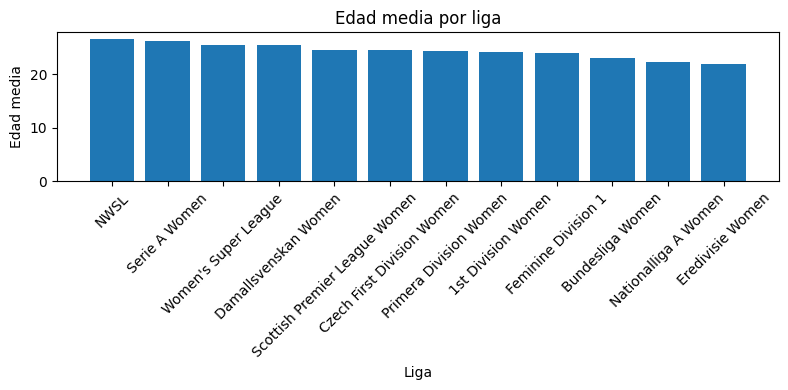

In [1642]:
plt.figure(figsize=(8, 4))
plt.bar(edad_promedio.index, edad_promedio.values)
plt.xlabel('Liga')
plt.ylabel('Edad media')
plt.title('Edad media por liga')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Este gráfico permite observar la edad media de las jugadoras por liga. Las ligas donde haya jugadoras con menor edad en promedio podrían ser ligas de desarrollo o con enforque formativo. Las ligas donde las jugadoras tengan mayor edad en promedio podrían ser ligas de jugadoras con mayor experiencia competitiva.

In [1643]:
# Estudiamos el número de jugadoras por liga
numero_jugadoras = df['league_name_x'].value_counts().sort_values(ascending=True)

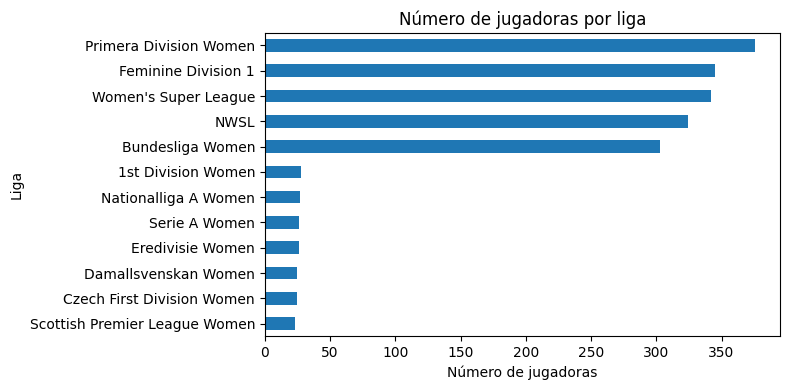

In [1644]:
plt.figure()
numero_jugadoras.plot(kind='barh', figsize=(8, 4))
plt.title('Número de jugadoras por liga')
plt.xlabel('Número de jugadoras')
plt.ylabel('Liga')
plt.tight_layout()
plt.show()

El gráfico muestra cuántas jugadoras compiten en cada liga. Así podemos ver en qué ligas está concentrado el talento al tener mayor representación femenina. Podemos observar que las ligas con mayor número de jugadoras son la la Women's Super League (Inglaterra), Feminine Division 1 (Francia) y Primera Division Women (España), seguidas de la NWSL (Estados Unidos) y la Bundesliga Women (Alemania).

In [1645]:
salario_promedio = df.groupby('league_name_x')['wage_eur'].mean().sort_values(ascending=False)
salario_promedio


,wage_eur
league_name_x,
Serie A Women,892.307692
Women's Super League,785.818713
NWSL,764.197531
Feminine Division 1,697.536232
Primera Division Women,693.617021
Bundesliga Women,688.283828
Damallsvenskan Women,656.000000
1st Division Women,603.571429
Eredivisie Women,596.153846


In [1646]:
# Estudiamos el salario medio por liga
# Como habíamos visto anteriormente, en la columna wage_eur tenemos nulos, por lo que los eliminamos de esta
# columna para evitar que distorsionen el salario medio por liga
salario_liga = df.dropna(subset=['wage_eur']).groupby('league_name_x')['wage_eur'].mean().sort_values()


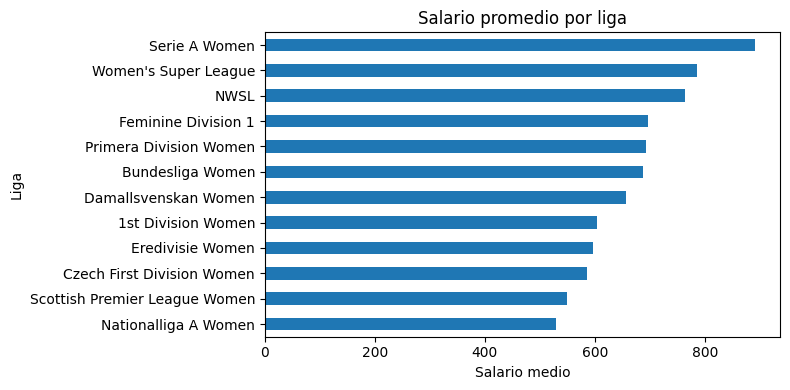

In [1647]:
plt.figure()
salario_liga.plot(kind='barh', figsize=(8, 4))
plt.title('Salario promedio por liga')
plt.xlabel('Salario medio')
plt.ylabel('Liga')
plt.tight_layout()
plt.show()

Con este gráfico podemos observar en qué liga se pagan los mayores salarios en promedio, por lo que podemos interpretar que en estas ligas hay mayor capacidad de retención de talento y mejores condiciones contractuales. Observamos que la liga con mayor salario promedio es la liga Serie A Women (Italia), seguida de la liga inglesa, francesa, estadounidense y española.

In [1648]:
# Estudiamos las nacionalidades de las jugadoras
nacionalidades = df['nationality_name_x'].value_counts().head(10).sort_values(ascending=True)

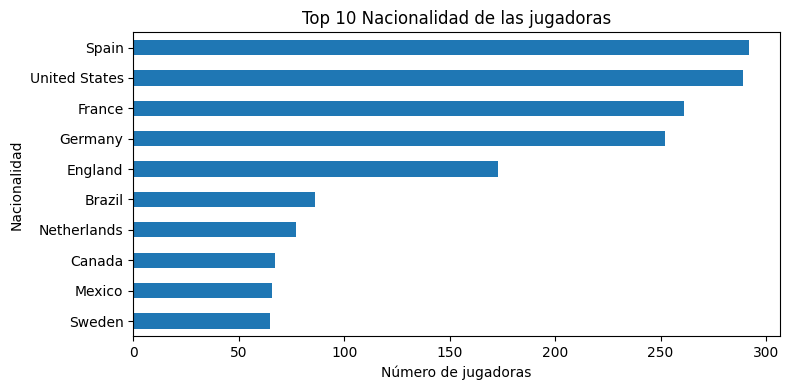

In [1649]:
plt.figure()
nacionalidades.plot(kind='barh', figsize=(8, 4))
plt.title('Top 10 Nacionalidad de las jugadoras')
plt.xlabel('Número de jugadoras')
plt.ylabel('Nacionalidad')
plt.tight_layout()
plt.show()

Las nacionalidades más frecuentes de las jugadores son francesa, inglesa y estadounidense. El top 5 coincide con el top 5 de número de jugadoras por liga. Podemos concluir que Francia, Inglaterra, Estados Unidos, España y Alemania son los países más desarrollados en fútbol femenino.

In [1650]:
# Observamos los equipos con mayor número de jugadoras
jugadoras_por_equipo = df['club_name'].value_counts().head(10).sort_values(ascending=True)

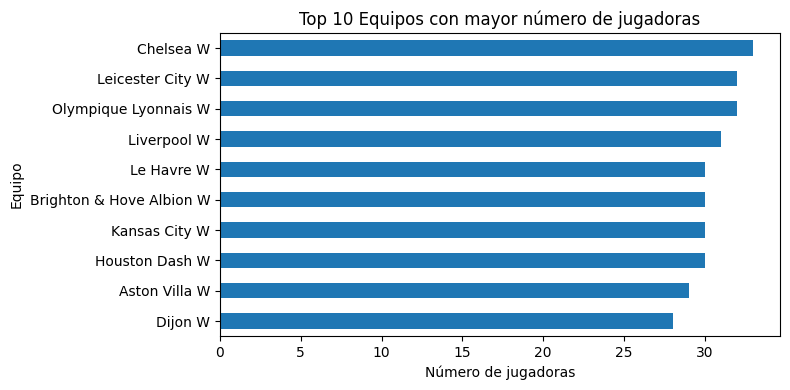

In [1651]:
plt.figure()
jugadoras_por_equipo.plot(kind='barh', figsize=(8, 4))
plt.title('Top 10 Equipos con mayor número de jugadoras')
plt.xlabel('Número de jugadoras')
plt.ylabel('Equipo')
plt.tight_layout()
plt.show()

Observamos que el top 10 de equipos con mayor número de jugadoras registradas son principalmente franceses e ingleses. Estos equipos son los que mayor plantilla tienen y, posiblemente, más presupuesto o estrategia de rotación.

# PREGUNTA 2: REGRESION (JUGADORAS)

Realiza un análisis exploratorio la valoración salarial ¿Cómo influyen en la valoración salarial de una jugadora? ¿Cuáles son las más relevantes? Para ello realiza un modelo de regresión e interpreta sus coeficientes. Además, analiza la precisión del modelo.

In [1652]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

variable que quiero predecir: wage_eur (salario)

In [1653]:
# ver si tiene null
df['wage_eur'].isnull().sum()

np.int64(561)

Tenemos nada menos que 561 wage_eur vacíos, esto nos pilla por sorpresa, lementablemente las vamos a tener que quitar porque nos parecce inapropiado sustituirlas por ejemplo por la media.

In [1654]:
df = df.dropna(subset=['wage_eur']) # quitar las filas con null de wage_eur


In [1655]:
# volver a ver si tiene null
df['wage_eur'].isnull().sum()

np.int64(0)

In [1656]:
y=df['wage_eur']


In [1657]:
y.shape

(1878,)

Nuestra variable dependiente y, que es wage_eur, ahora tiene 1878 entradas

Varaibles predictoras. Aunque se pueden hacer muchos análisis, nos vamos a quedar con un set de variables numéricas que representan algo así como unas métricas de rendimiento deportivo

In [1658]:
# Seleccionamos estas columnas
x = df[[
    'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
    'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy',
    'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
    'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
    'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
    'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping',
    'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression',
    'mentality_interceptions', 'mentality_positioning', 'mentality_vision',
    'mentality_penalties', 'mentality_composure', 'defending_marking_awareness',
    'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving',
    'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning',
    'goalkeeping_reflexes', 'goalkeeping_speed'
]]

In [1659]:
# muestra colummnas sin valores nulos
columnas_sin_nulos = x.isnull().sum()[x.isnull().sum() == 0].index.tolist()
print("Columnas sin valores nulos:")
print(columnas_sin_nulos)

Columnas sin valores nulos:
['attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']


In [1660]:
len(columnas_sin_nulos) # son 34, con esas nos vamos a quedar

34

In [1661]:
x = df[[
    'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes'
]]

In [1662]:
x.shape

(1878, 34)

In [1663]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, train_size=0.8, random_state=42)

In [1664]:
x_train.shape # comprobar que siguen siendo igual

(1502, 34)

In [1665]:
y_train.shape # comprobar que siguen siendo igual

(1502,)

In [1666]:
print(x_test.shape)
print(y_test.shape)

(376, 34)
(376,)


In [1667]:
from sklearn.linear_model import LinearRegression
reg_lineal= LinearRegression()
reg_lineal

LinearRegression()

In [1668]:
# aplicamos la regresión a los datos de entrenamiento
reg_lineal.fit(x_train, y_train)

LinearRegression()

In [1669]:
reg_lineal.intercept_

np.float64(-2200.5555860898585)

Significaría que si todas las métricas de desempeño futbolístico de una jugadora fueran cero (lo cual probablemente no ocurre en la realidad), el modelo predeciría un salario de aproximadamente -2200,56 euros. En este caso, no tiene demasiado uso práctico.

In [1670]:
reg_lineal.coef_

array([-2.80940514e-02,  2.21830902e-02,  7.95877115e+00,  2.91542742e+00,
        2.08358018e+00,  2.41596749e+00,  2.32700563e-01, -3.56099237e-02,
        2.30772160e+00,  6.02870182e+00,  1.86453813e+00,  1.28946412e+00,
       -4.19508268e-02,  1.25342949e+01,  9.38703628e-01,  1.15500480e+00,
       -8.38534583e+00,  1.98044928e+00,  4.01394348e+00, -1.27140900e+00,
       -8.49981718e-01, -3.84847581e-01, -7.55447595e-03, -1.09654569e+00,
        3.38716956e-01,  4.68921778e+00, -2.10222445e-01, -1.35955724e+00,
        1.33786892e+00,  3.94042165e+00,  6.01393339e+00,  3.99171236e+00,
        1.93666544e+00,  4.34925311e+00])

In [1671]:
# Lista de nombres de las variables (en el mismo orden que los coeficientes)
variables = [
    'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy',
    'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
    'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
    'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
    'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping',
    'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression',
    'mentality_interceptions', 'mentality_positioning', 'mentality_vision',
    'mentality_penalties', 'mentality_composure', 'defending_marking_awareness',
    'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving',
    'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning',
    'goalkeeping_reflexes'
]

coefs = reg_lineal.coef_

coef_df = pd.DataFrame({'variable': variables, 'coeficiente': coefs})

# Top 5 positivos
top_positivos = coef_df.sort_values('coeficiente', ascending=False).head(5)

# Top 5 negativos
top_negativos = coef_df.sort_values('coeficiente').head(5)



In [1672]:
print("Variables que más afectan positivamente al salario:")
print(top_positivos)

Variables que más afectan positivamente al salario:
                      variable  coeficiente
13          movement_reactions    12.534295
2   attacking_heading_accuracy     7.958771
9           skill_ball_control     6.028702
30        goalkeeping_handling     6.013933
25         mentality_composure     4.689218


El análisis muestra que las habilidades relacionadas con la reacción en el juego, la precisión en el remate de cabeza y el control de balón son las que más influyen positivamente en el salario de las futbolistas profesionales. Estas métricas reflejan aspectos clave del rendimiento que los clubes valoran especialmente al determinar la remuneración de las jugadoras.

In [1673]:
print("\nVariables que más afectan negativamente al salario:")
print(top_negativos)


Variables que más afectan negativamente al salario:
                     variable  coeficiente
16              power_jumping    -8.385346
27  defending_standing_tackle    -1.359557
19           power_long_shots    -1.271409
23           mentality_vision    -1.096546
20       mentality_aggression    -0.849982


Las variables que más afectan negativamente al salario son principalmente aspectos físicos y defensivos, como el salto, la agresividad y la visión defensiva. Esto sugiere que, en el contexto actual del fútbol femenino profesional, destacar en estas métricas no se traduce en una mayor remuneración, posiblemente porque los clubes priorizan habilidades técnicas y ofensivas a la hora de valorar económicamente a las jugadoras.

In [1674]:
y_pred=reg_lineal.predict(x_test)
y_pred

array([ 494.65530139,  389.00599521,    4.39126338,  902.68395892,
        942.33608165,  921.58799062, 1035.10211613,  341.13655456,
        624.26922324,  142.08566578,  735.29304051,  777.50149772,
        840.82720344,  719.82404295,  808.40269102,  555.80795857,
       1193.90213877,  487.38048536,  877.97831477,  537.37387644,
        981.66990843,  551.65058933,  513.33312469,  546.02728182,
        839.25137989,  718.39360815, 1201.09037436, 1183.47280626,
        326.67775167, 1016.45854458,  928.63836339,  785.66877518,
        593.27895765,  526.18423655,  809.45046539,  769.40100053,
        563.49763286,  578.60106347,  104.7735364 ,  433.4023795 ,
        347.59712621,  991.20231964,  225.343371  ,  800.60119165,
        921.55338857,  453.02140971,  564.08272283, 1073.50645938,
        632.62727949,  798.31166235,  898.17400947,  608.46820143,
        623.13516835,  751.73747088, 1103.34996384,  756.11244067,
        616.4107541 ,  400.66529017,  934.99266281,  928.00132

In [1675]:
# ver que tan bueno es el modelo
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [1676]:
mean_absolute_error(y_test, y_pred)

142.04138089812847

In [1677]:
salario_medio = df['wage_eur'].mean()
print(f"Salario medio: {salario_medio:.2f} euros")

Salario medio: 716.88 euros


El modelo presenta un error absoluto medio (MAE) de 142 euros frente a un salario medio de 716,88 euros. Esto significa que, en promedio, las predicciones del modelo difieren del salario real en aproximadamente un 20% del salario típico. Aunque el modelo logra capturar parte de la variabilidad salarial, el margen de error es relevante en relación al salario medio, por lo que la precisión es moderada y puede ser suficiente para análisis exploratorios, pero limitada para aplicaciones que requieran estimaciones muy precisas


In [1678]:
mean_squared_error(y_test, y_pred)

35741.99753226598

Como el MSE penaliza más fuertemente los errores grandes, este valor sugiere que existen algunas predicciones con desviaciones importantes respecto al valor real. Esto podría ser compatible con la presencia de algunas jugadoras "estrellas" que cobren suelos mucho más altos que la media.

In [1679]:
# graficar
fig = px.scatter(
    df,
    x='movement_reactions',
    y='wage_eur',
    trendline='ols',  # Ajusta y muestra la línea de regresión
    labels={'movement_reactions': 'Movement Reactions', 'salary': 'Salario'},
    title='Relación entre Movement Reactions y Salario'
)
fig.show()


In [1680]:

# Gráfico de dispersión con línea de regresión

df = pd.DataFrame({'wage_eur': y_test, 'y_pred': y_pred})

fig = px.scatter(
    df,
    x='wage_eur',
    y='y_pred',
    labels={'wage_eur': 'Salario real', 'y_pred': 'Salario predicho'},
    title='Salario real vs. Salario predicho',
    trendline='ols'
)
fig.show()


# PREGUNTA 3: REGRESIÓN (CLUBES)

Realiza otro modelo de regresión sobre el salario con otras variables informativas de equipo, debes explicar al CEO si existe algún patrón en el pago de salarios relacionado con los clubes

In [1681]:
merged.columns

Index(['player_id', 'player_url', 'fifa_version_x', 'fifa_update_x',
       'update_as_of_x', 'short_name', 'long_name', 'player_positions',
       'overall_x', 'potential',
       ...
       'off_corners', 'off_free_kicks', 'build_up_play_speed',
       'build_up_play_dribbling', 'build_up_play_passing',
       'build_up_play_positioning', 'chance_creation_passing',
       'chance_creation_crossing', 'chance_creation_shooting',
       'chance_creation_positioning'],
      dtype='object', length=162)

### PRIMERA HIPOTESIS

Nos interesa especialmente ver si hay correlación entre el prestigio internacional del club y el sario

In [1682]:
# vemos si hay null en international_prestige
merged['international_prestige'].isnull().any()

np.True_

In [1683]:
print(merged['international_prestige'].isnull().sum())

569


tiene 569 filas con 'international_prestige' vacías, las quitamos

In [1684]:
merged_filtrado = merged.dropna(subset=['international_prestige'])

In [1685]:
merged['international_prestige'].nunique()

1

In [1686]:
teams['international_prestige'].nunique()

9

In [1687]:
# vamos a cargar el teams original
teams = pd.read_csv('female_teams.csv')

In [1688]:
teams['international_prestige'].nunique()

17

In [1689]:
players.shape

(2439, 109)

In [1690]:
merged2= players.merge(teams, on='team_id', how='left')


In [1691]:
merged2.shape

(3017, 162)

In [1692]:
merged2['international_prestige'].nunique()

1

In [1693]:
print(players['team_id'].nunique())
print(players['team_id'].unique())


74
[    nan 116041. 116386. 116039. 116037. 116020. 116033. 116018. 116042.
 116040. 116010. 116035. 116014. 116343. 116011. 116015. 116416. 116038.
 116036. 116013. 116016. 116034. 116009. 116012. 116001. 116311. 131219.
 116302. 116310. 116340. 116332. 116338. 131360. 131361. 116334. 116307.
 116336. 116312. 116309. 131106. 116304. 131362. 115999. 116305. 116308.
 116327. 116333. 116337. 131359. 131363. 116280. 116004. 116303. 115995.
 116339. 116300. 116328. 115998. 131358. 115996. 116017. 116021. 116003.
 116002. 116326. 131283. 116306. 115997. 131391. 116325. 116330. 131125.
 131386. 116044. 116331.]


In [1694]:
merged_check = players.merge(teams[['team_id', 'international_prestige']], on='team_id', how='left')
print(merged_check['international_prestige'].value_counts())


international_prestige
3.0    2448
Name: count, dtype: int64


In [1695]:
print(teams['international_prestige'].unique())


[ 3  6 10  7  4  8  5  2  1 20 14 17 13 16 11 15  9]


In [1696]:
print(players['team_id'].nunique())
print(players['team_id'].unique())


74
[    nan 116041. 116386. 116039. 116037. 116020. 116033. 116018. 116042.
 116040. 116010. 116035. 116014. 116343. 116011. 116015. 116416. 116038.
 116036. 116013. 116016. 116034. 116009. 116012. 116001. 116311. 131219.
 116302. 116310. 116340. 116332. 116338. 131360. 131361. 116334. 116307.
 116336. 116312. 116309. 131106. 116304. 131362. 115999. 116305. 116308.
 116327. 116333. 116337. 131359. 131363. 116280. 116004. 116303. 115995.
 116339. 116300. 116328. 115998. 131358. 115996. 116017. 116021. 116003.
 116002. 116326. 131283. 116306. 115997. 131391. 116325. 116330. 131125.
 131386. 116044. 116331.]


In [1697]:
# Creamos una lista de los team_id presentes en players, excluyendo el NaN
team_ids_players = [tid for tid in players['team_id'].unique() if pd.notnull(tid)]

# Buscamos el prestigio internacional de esos equipos en teams
prestigios_presentes = teams[teams['team_id'].isin(team_ids_players)]['international_prestige'].unique()
print(prestigios_presentes)


[3]


In [1698]:
# Lista de team_id presentes en players (sin NaN)
team_ids_players = [tid for tid in players['team_id'].unique() if pd.notnull(tid)]

# Verifica los valores de international_prestige de esos equipos en teams
print(teams[teams['team_id'].isin(team_ids_players)][['team_id', 'international_prestige']])
print(teams[teams['team_id'].isin(team_ids_players)]['international_prestige'].value_counts())


     team_id  international_prestige
0     116325                       3
4     116033                       3
6     115998                       3
7     116009                       3
8     116010                       3
..       ...                     ...
122   116039                       3
123   116343                       3
124   116416                       3
125   116041                       3
126   116386                       3

[95 rows x 2 columns]
international_prestige
3    95
Name: count, dtype: int64


In [1699]:
print(teams['international_prestige'].value_counts())


international_prestige
3     103
8      26
10     17
7      17
4      16
5      15
2      12
6       8
1       8
20      2
14      1
17      1
13      1
16      1
11      1
15      1
9       1
Name: count, dtype: int64


Aunque en el dataframe teams hay 17 valores distintos de international_prestige, la mayoría de los equipos (103 de ellos) tienen el valor 3. Al hacer el merge con players, que contiene jugadores de 74 equipos, todos esos equipos pertenecen al grupo mayoritario con prestigio 3. Por eso, tras el merge, la columna international_prestige en el dataframe mergeado solo muestra ese único valor. Por lo tanto, tenemos que desechar el análisis entre wage_eur e international_prestige



### SEGUNDA HIPOTESIS

Analizaremos la relación entre salario y métricas de juego de los equipos

Usameremos estas variables:

In [1700]:
merged.shape

(2439, 162)

In [1701]:
# comprobamos los nulos de las variables selecionadas:
merged[['short_free_kick', 'long_free_kick', 'left_short_free_kick', 'right_short_free_kick', 'penalties', 'left_corner', 'right_corner']].isnull().any()


,0
short_free_kick,True
long_free_kick,True
left_short_free_kick,True
right_short_free_kick,True
penalties,True
left_corner,True
right_corner,True


In [1702]:
print(merged[['short_free_kick', 'long_free_kick', 'left_short_free_kick', 'right_short_free_kick', 'penalties', 'left_corner', 'right_corner']].isnull().sum())


short_free_kick          569
long_free_kick           569
left_short_free_kick     569
right_short_free_kick    569
penalties                569
left_corner              569
right_corner             569
dtype: int64


In [1703]:
merged = merged.dropna(subset=['short_free_kick', 'long_free_kick', 'left_short_free_kick', 'right_short_free_kick', 'penalties', 'left_corner', 'right_corner'])


In [1704]:
y=merged['wage_eur']


In [1705]:
x=merged[['short_free_kick', 'long_free_kick', 'left_short_free_kick', 'right_short_free_kick', 'penalties', 'left_corner', 'right_corner']]


In [1706]:
x.shape

(1870, 7)

In [1707]:
y.shape

(1870,)

In [1708]:
from sklearn.model_selection import train_test_split

In [1709]:
x_train, x_test, y_train, y_test=train_test_split(x, y, train_size=0.7, random_state=42)
x_train.shape # comprobar que siguen siendo igual
print(x_test.shape) # comprobar los de test, de otra forma
print(y_test.shape)

(561, 7)
(561,)


In [1710]:
# importar la regresión lineal
from sklearn.linear_model import LinearRegression
reg_lineal= LinearRegression()
reg_lineal

LinearRegression()

In [1711]:
# aplicar regresión linear a los datos de etto
reg_lineal.fit(x_train, y_train)

LinearRegression()

In [1712]:
reg_lineal.intercept_

np.float64(2699.859737459778)

Indica el salario estimado (wage_eur) cuando todas las métricas de juego analizadas (como tiros libres, penaltis y córners) son cero. Esto sugiere que el salario base esperado para una jugadora, aun sin estas métricas a nivel de equipo, sería de unos 2700 euros. Esto no tiene interpretación realista.

In [1713]:
reg_lineal.coef_

array([ 0.0006628 , -0.00549939, -0.00223113, -0.0034671 ,  0.00049982,
        0.00335695, -0.00108057])

Los coeficientes obtenidos en el modelo son muy pequeños, por lo que no se puede determinar que variables como la precisión en tiros libres cortos y largos, la capacidad para ejecutar penaltis, o la habilidad en lanzar saques de esquina influyan de forma significativa en el salario (wage_eur) de las jugadoras según este modelo, es decir, no parecen tener un impacto relevante en la explicación del salario de las futbolistas.

### TERCERA HIPOTESIS

Vamos a analizar como explica el salario la pertenencia a determinados clubs, la liga en la que compite y la nacionalidad de las jugadoras

In [1714]:
# Estudiamos el salario medio por club
salario_club = merged.dropna(subset=['wage_eur']).groupby('team_name')['wage_eur'].mean().sort_values()

In [1715]:
salario_club_df = salario_club.reset_index()

In [1716]:
# Ahora crea el gráfico de barras
fig = px.bar(
    salario_club_df,
    x='wage_eur',       # Salario medio en el eje X
    y='team_name',      # Club en el eje Y
    orientation='h',    # Barras horizontales
    labels={'team_name': 'Club', 'wage_eur': 'Salario medio (€)'},
    title='Salario medio por club',
    width=900,   # Aumenta el ancho total del gráfico
    height=800)

In [1717]:
fig.update_layout(xaxis={'categoryorder':'total ascending'})
fig.update_yaxes(tickfont=dict(size=8))  # Reduce el tamaño de la fuente
fig.update_yaxes(tickmode='array', tickvals=salario_club_df['team_name'], ticktext=salario_club_df['team_name'])
fig.show()

Tenemos un indicio de concentracion de salario por club, donde quizá también podemos encontrar correlación con el tipo de liga y la nacionalidad.

In [1718]:
# Seleccionamos solo las columnas relevantes para nuestra hipótesis
df_corr = merged[['wage_eur', 'team_id', 'league_id_y', 'nationality_id_y']]

# Calcula la matriz de correlación
corr_matrix = df_corr.corr()

print(corr_matrix)


                  wage_eur   team_id  league_id_y  nationality_id_y
wage_eur          1.000000 -0.188030    -0.007845          0.027346
team_id          -0.188030  1.000000     0.032734         -0.065111
league_id_y      -0.007845  0.032734     1.000000          0.017049
nationality_id_y  0.027346 -0.065111     0.017049          1.000000


Los valores de correlación bajos (cercanos a 0) que observas se deben a que los identificadores (ID) como team_id, league_id_y y nationality_id_y son variables categóricas representadas con números, los ID son sólo etiquetas, pero no tienen un significado numérico real.

Vamos a pasar estas tres variables a factores con One-Hot-Encoder

In [1719]:
# One-hot encoding de las variables categóricas
df_model = merged[['team_name', 'league_name_x', 'nationality_name_x', 'wage_eur']]



In [1720]:
df_model_encoded = pd.get_dummies(
    df_model,
    columns=['team_name', 'league_name_x', 'nationality_name_x'],
    drop_first=True)


In [1721]:
df_model_encoded.shape

(1870, 159)

Aprovechamos para hacer una matriz de correlación:

In [1722]:
correlation_matrix = df_model_encoded.corr()

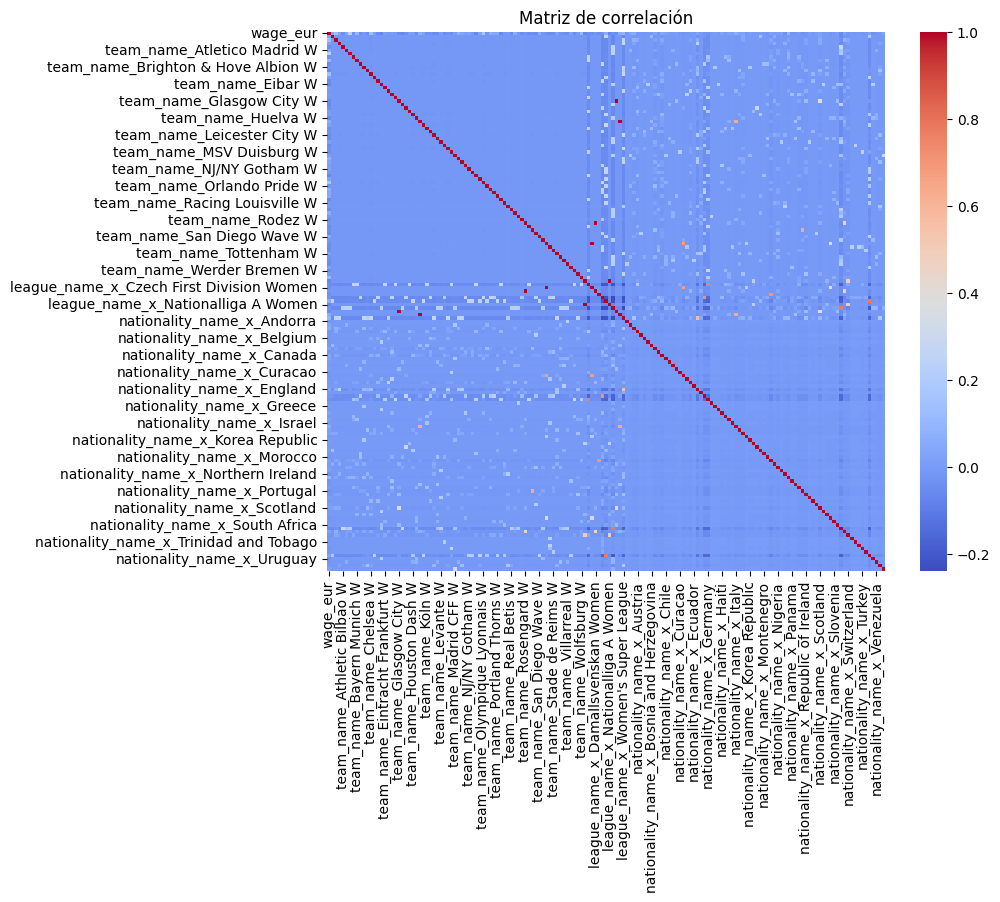

In [1723]:
# visualizar la matriz de correlacion (Seaborn, Matplotlib)
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 7))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()

Apenas se puede distinguir nada en el gráfico

In [1724]:
# Vamos a extrer sólo la correlaciones de las variables con el salario:
correlacion_wage = correlation_matrix['wage_eur'].sort_values(ascending=False)
print(correlacion_wage)

wage_eur                              1.000000
team_name_Barcelona W                 0.234186
team_name_Olympique Lyonnais W        0.166572
team_name_Arsenal W                   0.141843
team_name_Chelsea W                   0.140895
                                        ...   
team_name_Granada W                  -0.065344
league_name_x_Nationalliga A Women   -0.065657
team_name_Zurich W                   -0.065657
team_name_Nürnberg W                 -0.069099
team_name_Eibar W                    -0.070128
Name: wage_eur, Length: 159, dtype: float64


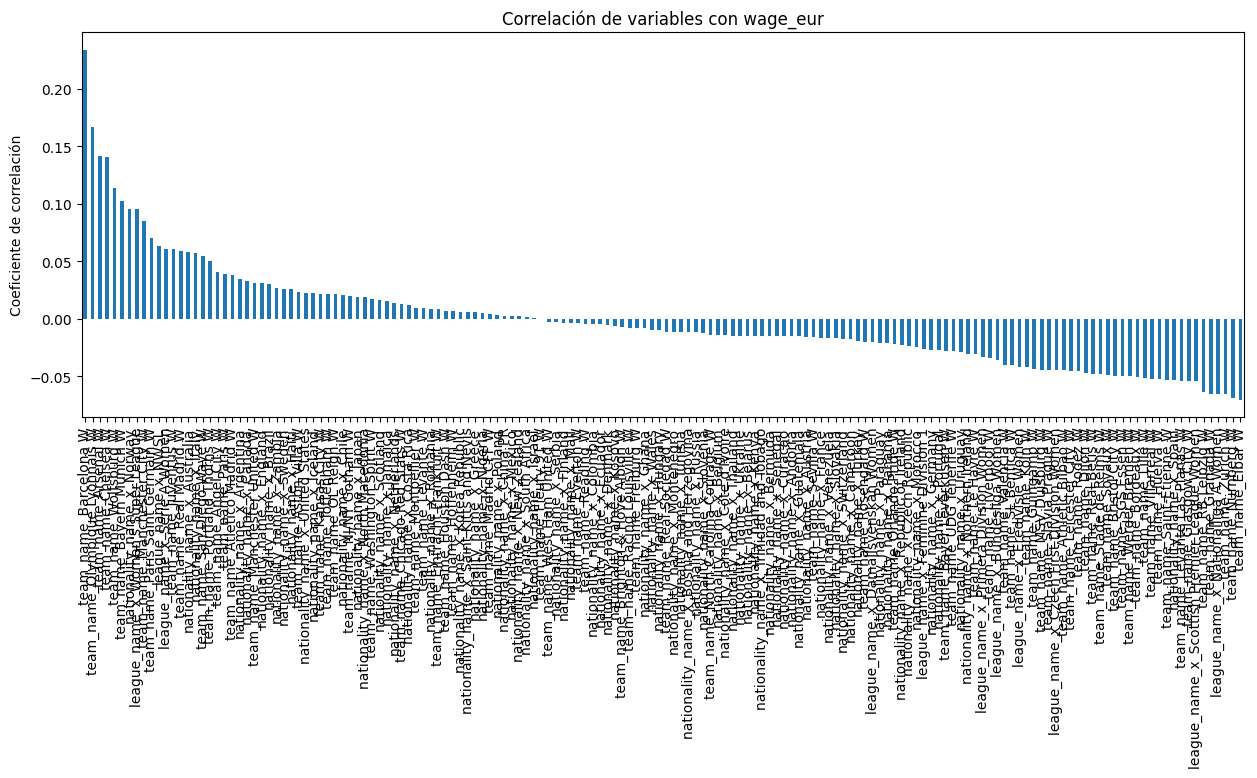

In [1725]:
correlacion_wage.drop('wage_eur').plot(kind='bar', figsize=(15,5))
plt.title('Correlación de variables con wage_eur')
plt.ylabel('Coeficiente de correlación')
plt.show()

Aunque sin filtrar un poco el gráfico no se distingue muy bien, se aprecia que la correlación más directa con el salario está en la pertenencia a ciertos clubs grandes, como el Barcelona, el Arsenal o el Olimpique.

Regresión Lineal:

In [1726]:
# definir las variables
X = df_model_encoded.drop('wage_eur', axis=1)
y = df_model_encoded['wage_eur']


In [1727]:
# 80% entrenamiento, 20% prueba
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [1728]:
reg_lineal = LinearRegression()
reg_lineal.fit(x_train, y_train)

LinearRegression()

In [1729]:
reg_lineal.intercept_

np.float64(594.0738664529582)

In [1730]:
reg_lineal.coef_

array([ 1.29678540e+01,  3.86259895e+02, -9.77981494e+00, -5.92827244e+01,
        1.13053256e+02,  6.85726448e+02, -7.58816866e+01,  3.32036608e+02,
       -1.11888929e+02, -1.57925431e+02, -2.29443485e+02,  3.06850722e+02,
        1.91484095e+00, -1.10298940e+02, -1.75249452e+02,  4.15570850e+01,
       -8.24263566e+01,  4.29848205e+01,  3.47434244e+00, -6.73587736e+01,
       -1.50377132e+02, -8.25525932e+01,  4.66572022e+01, -3.29093934e+01,
       -1.53445072e+02,  9.71726419e+01,  4.90994612e+01, -1.11265243e+02,
       -3.05967530e+01, -1.65299927e+02, -9.93161450e+01,  3.21785576e+01,
       -1.11924184e+02, -1.73242522e+02, -5.29049295e+01,  1.92665944e-01,
        3.46480940e+02,  4.13951121e+01,  1.15268714e+02,  5.37925394e+01,
       -6.39052688e+01, -1.81148732e+02,  4.26775598e+01,  4.15562704e+02,
       -1.27746410e+02,  2.55305778e+02,  1.66604174e+02,  6.95891896e+01,
       -1.50751925e+02, -6.30029529e+01, -6.40878886e+01, -8.80736975e+01,
        2.13526216e+02, -

In [1731]:
coefs = pd.Series(reg_lineal.coef_, index=X_encoded.columns)

In [1732]:
print(coefs)

team_name_Angel City W               12.967854
team_name_Arsenal W                 386.259895
team_name_Aston Villa W              -9.779815
team_name_Athletic Bilbao W         -59.282724
team_name_Atletico Madrid W         113.053256
                                       ...    
nationality_name_x_United States     14.220128
nationality_name_x_Uruguay          -10.035765
nationality_name_x_Venezuela        -22.035796
nationality_name_x_Wales             28.837318
nationality_name_x_Zambia           363.124651
Length: 158, dtype: float64


In [1733]:
top10 = coefs.sort_values(ascending=False).head(10)
bottom10 = coefs.sort_values().head(10)
print("Top 10 que más aumentan:\n", top10)
print("Top 10 que más disminuyen:\n", bottom10)

Top 10 que más aumentan:
 team_name_Barcelona W                       685.726448
team_name_Olympique Lyonnais W              415.562704
nationality_name_x_Chile                    386.817979
team_name_Arsenal W                         386.259895
nationality_name_x_Kosovo                   375.895225
nationality_name_x_Zambia                   363.124651
team_name_Wolfsburg W                       357.605471
team_name_Manchester City W                 346.480940
nationality_name_x_Norway                   344.443717
nationality_name_x_Saint Kitts and Nevis    338.682903
dtype: float64
Top 10 que más disminuyen:
 nationality_name_x_Russia            -308.970274
team_name_Bristol City W             -229.443485
team_name_Nürnberg W                 -181.148732
team_name_Eibar W                    -175.249452
team_name_Liverpool W                -173.242522
team_name_Leicester City W           -165.299927
nationality_name_x_Paraguay          -162.892844
nationality_name_x_Panama            -

In [1734]:
# Top 5 clubes que más aumentan y más disminuyen el salario
club_coefs = coefs[coefs.index.str.startswith('team_name_')]
top5_club = club_coefs.sort_values(ascending=False).head(5)
bottom5_club = club_coefs.sort_values().head(5)
print("Top 5 clubes positivos:\n", top5_club)
print("Top 5 clubes negativos:\n", bottom5_club)

Top 5 clubes positivos:
 team_name_Barcelona W             685.726448
team_name_Olympique Lyonnais W    415.562704
team_name_Arsenal W               386.259895
team_name_Wolfsburg W             357.605471
team_name_Manchester City W       346.480940
dtype: float64
Top 5 clubes negativos:
 team_name_Bristol City W     -229.443485
team_name_Nürnberg W         -181.148732
team_name_Eibar W            -175.249452
team_name_Liverpool W        -173.242522
team_name_Leicester City W   -165.299927
dtype: float64


In [1735]:
# Top 5 nacionalidades que más aumentan y más disminuyen el salario
nat_coefs = coefs[coefs.index.str.startswith('nationality_name_x_')]
top5_nat = nat_coefs.sort_values(ascending=False).head(5)
bottom5_nat = nat_coefs.sort_values().head(5)
print("Top 5 nacionalidades positivas:\n", top5_nat)
print("Top 5 nacionalidades negativas:\n", bottom5_nat)

Top 5 nacionalidades positivas:
 nationality_name_x_Chile                    386.817979
nationality_name_x_Kosovo                   375.895225
nationality_name_x_Zambia                   363.124651
nationality_name_x_Norway                   344.443717
nationality_name_x_Saint Kitts and Nevis    338.682903
dtype: float64
Top 5 nacionalidades negativas:
 nationality_name_x_Russia             -308.970274
nationality_name_x_Paraguay           -162.892844
nationality_name_x_Panama             -161.790787
nationality_name_x_Northern Ireland   -108.746681
nationality_name_x_Kenya               -57.863249
dtype: float64


In [1736]:
# Top 5 ligas que más aumentan y más disminuyen el salario
liga_coefs = coefs[coefs.index.str.startswith('league_name_x_')]
top5_liga = liga_coefs.sort_values(ascending=False).head(5)
bottom5_liga = liga_coefs.sort_values().head(5)
print("Top 5 ligas positivas:\n", top5_liga)
print("Top 5 ligas negativas:\n", bottom5_liga)

Top 5 ligas positivas:
 league_name_x_Women's Super League      128.806747
league_name_x_NWSL                      124.395556
league_name_x_Serie A Women              97.172642
league_name_x_Primera Division Women     42.608817
league_name_x_Feminine Division 1        24.732100
dtype: float64
Top 5 ligas negativas:
 league_name_x_Nationalliga A Women            -85.929881
league_name_x_Eredivisie Women                -74.993147
league_name_x_Scottish Premier League Women   -67.358774
league_name_x_Czech First Division Women      -18.105309
league_name_x_Bundesliga Women                -16.626294
dtype: float64


Los coeficientes obtenidos en el modelo de regresión lineal permiten cuantificar el efecto que tiene pertenecer a un determinado club, liga o nacionalidad sobre el salario esperado de las jugadoras, manteniendo constantes el resto de variables. En el caso de los clubes, los resultados muestran diferencias muy marcadas: equipos como Barcelona, Olympique Lyonnais, Arsenal, Wolfsburg y Manchester City presentan coeficientes positivos elevados, lo que indica que sus jugadoras perciben salarios significativamente superiores al club de referencia. Por el contrario, clubes como Bristol City, Nürnberg, Eibar, Liverpool y Leicester City se asocian a salarios considerablemente menores. Esta disparidad revela una fuerte concentración de recursos y talento en los clubes de élite, mientras que otros equipos, incluso pertenecientes a ligas importantes, quedan rezagados en términos de compensación económica.

En cuanto a las ligas, también se observan diferencias notables. Ligas como la Women's Super League, la NWSL y la Serie A Women destacan por sus coeficientes positivos, reflejando que jugar en estas competiciones está asociado a salarios más altos. En el extremo opuesto, ligas como la Nationalliga A Women, la Eredivisie Women o la Scottish Premier League Women muestran coeficientes negativos, lo que sugiere una menor capacidad para ofrecer salarios competitivos. Estos resultados ponen de manifiesto la importancia del contexto liguero en la determinación del salario de las jugadoras, más allá del club específico al que pertenezcan.

Respecto a la nacionalidad, la interpretación de los coeficientes requiere un análisis más matizado. Algunas nacionalidades, como Chile, Kosovo, Zambia o Saint Kitts and Nevis, aparecen con coeficientes positivos muy elevados. Sin embargo, estos resultados pueden estar influenciados por la baja frecuencia de jugadoras de estas nacionalidades en la muestra y por la posible presencia de outliers, como jugadoras estrella que, por su trayectoria o reconocimiento internacional, perciben salarios muy superiores a la media de la muestra. Por tanto, la magnitud de estos coeficientes no necesariamente refleja una ventaja estructural para todas las jugadoras de esa nacionalidad, sino que puede deberse a casos particulares que sesgan el promedio. En cambio, nacionalidades como Rusia, Paraguay o Panamá presentan coeficientes negativos, lo que podría estar relacionado tanto con factores de mercado como con la menor presencia de jugadoras de estos países en clubes de alto nivel.



# PREGUNTA 4: CONCLUSIONES

Recomendaciones para poder elaborar una estrategia de igualdad de oportunidades en el desarrollo de los clubes y evitar la concentración del talento.

El club de pertenencia es el factor más determinante en la explicación del salario de las jugadoras, con diferencias muy marcadas entre equipos de élite y el resto. Esta brecha salarial, reflejo de la concentración de recursos y visibilidad, no solo limita la movilidad del talento sino que perpetúa un ecosistema competitivo desigual, donde solo unos pocos clubes pueden atraer y retener a las mejores futbolistas.

La información sobre nacionalidades y ligas refuerza esta idea: algunas nacionalidades aparecen con coeficientes elevados, pero esto suele deberse a la presencia de pocas jugadoras que, en muchos casos, son estrellas mediáticas o excepciones dentro de la muestra. Asimismo, las ligas con mayor prestigio y recursos económicos también explican diferencias salariales significativas, lo que sugiere que la desigualdad no solo es interna a los clubes, sino también estructural en el propio sistema de competición.

Ante este panorama, una política de subvenciones o ayudas debería orientarse a reducir las desigualdades estructurales entre clubes. Una opción eficaz sería destinar fondos públicos o privados, gestionados por las federaciones o ligas, específicamente a los clubes con menor capacidad financiera y menor visibilidad, para que puedan invertir en infraestructuras, formación de talento y condiciones contractuales competitivas. Estas ayudas deberían estar condicionadas a planes de desarrollo deportivo, garantizando que el dinero se emplea en la profesionalización y el crecimiento sostenible del club, y no solo en fichajes puntuales.

Adicionalmente, sería recomendable acompañar las ayudas económicas en programas de base, de formación, de intercambio y mentoría entre clubes de distinto nivel, así como de incentivos para la promoción de jugadoras jóvenes y la captación de talento local. De este modo, se puede contribuir a una mayor movilidad del talento, evitando que las diferencias salariales y de oportunidades sigan concentrándose en unos pocos equipos.

Se podrían implementar limitaciones por ejemplo a la capacidad de contratar jugardoras extranjeras, limitar presupuestos, exigir una cantidad mínima de jugadoras locales para estimular la "cantera" como ejemplos de reglamentaciones deportivas que permitan igualar las oportunidades, estimular la competencia e incentivar la práctica del deporte a todo nivel.

La combinación de subvenciones directas, formación y transparencia en la gestión puede ser la base para avanzar hacia una mayor igualdad y competitividad en el fútbol femenino, tal y como recomiendan tanto organismos nacionales como internacionales